## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 1.เขียนโปรแกรมสำหรับสร้างตัวจำแนกแบบเบส์สำหรับการแจกแจงปรกติตัวแปรเดียว กรณีที่ความแปรปรวนของทั้งสองคลาสเท่ากัน
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจก 
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

In [235]:

import numpy as np
import matplotlib.pyplot as plt


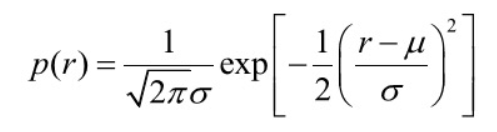

In [236]:

# Gaussian Probability Density Function for a normal distribution
def gaussian_pdf(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))


In [237]:

# Posterior probability calculations
def posterior(x, mean1, mean2, var1, var2, prior1, prior2):
    like_c1 = gaussian_pdf(x, mean1, var1) * prior1
    like_c2 = gaussian_pdf(x, mean2, var2) * prior2
    total = like_c1 + like_c2
    return like_c1 / total, like_c2 / total


In [238]:

# Function to plot distributions with optional random sampling
def plot_distribution(mean1, mean2, variance, prior1, prior2, seed=None, sampled=False):
    # Set the random seed if provided
    if seed is not None:
        np.random.seed(seed)

    x = np.linspace(-4, 4, 400)
    if sampled:
        # Generate random samples with the given seed
        mean1_sample = np.random.normal(mean1, np.sqrt(variance), 25)
        mean2_sample = np.random.normal(mean2, np.sqrt(variance), 25)
        var1 = np.var(mean1_sample)
        var2 = np.var(mean2_sample)
        mean1 = np.mean(mean1_sample)
        mean2 = np.mean(mean2_sample)
        title_suffix = f"Sampled (Seed={seed})"
    else:
        var1 = var2 = variance
        title_suffix = "Set"

    # Plot Likelihoods
    plt.figure(figsize=(25, 8))
    plt.subplot(1, 2, 1)
    plt.plot(x, gaussian_pdf(x, mean1, var1), label=f'Class c1 ({title_suffix})', color='blue')
    plt.plot(x, gaussian_pdf(x, mean2, var2), label=f'Class c2 ({title_suffix})', color='red', linestyle='dashed')
    plt.axvline(x=(mean1 + mean2) / 2, color='green', linestyle=':', label='Decision Boundary')
    plt.xlabel('x')
    plt.ylabel('Likelihood')
    plt.title(f'Likelihoods - {title_suffix} Parameters')
    plt.ylim(0, 1.2)
    plt.legend()
    
    # Plot Posterior Probabilities
    post_c1, post_c2 = posterior(x, mean1, mean2, var1, var2, prior1, prior2)
    plt.subplot(1, 2, 2)
    plt.plot(x, post_c1, label=f'Class c1 ({title_suffix})', color='blue')
    plt.plot(x, post_c2, label=f'Class c2 ({title_suffix})', color='red', linestyle='dashed')
    plt.axvline(x=(mean1 + mean2) / 2, color='green', linestyle=':', label='Decision Boundary')
    plt.xlabel('x')
    plt.ylabel('Posterior Probability')
    plt.title(f'Posterior Probabilities - {title_suffix} Parameters')
    plt.ylim(0, 1.2)
    plt.legend()
    
    plt.show()


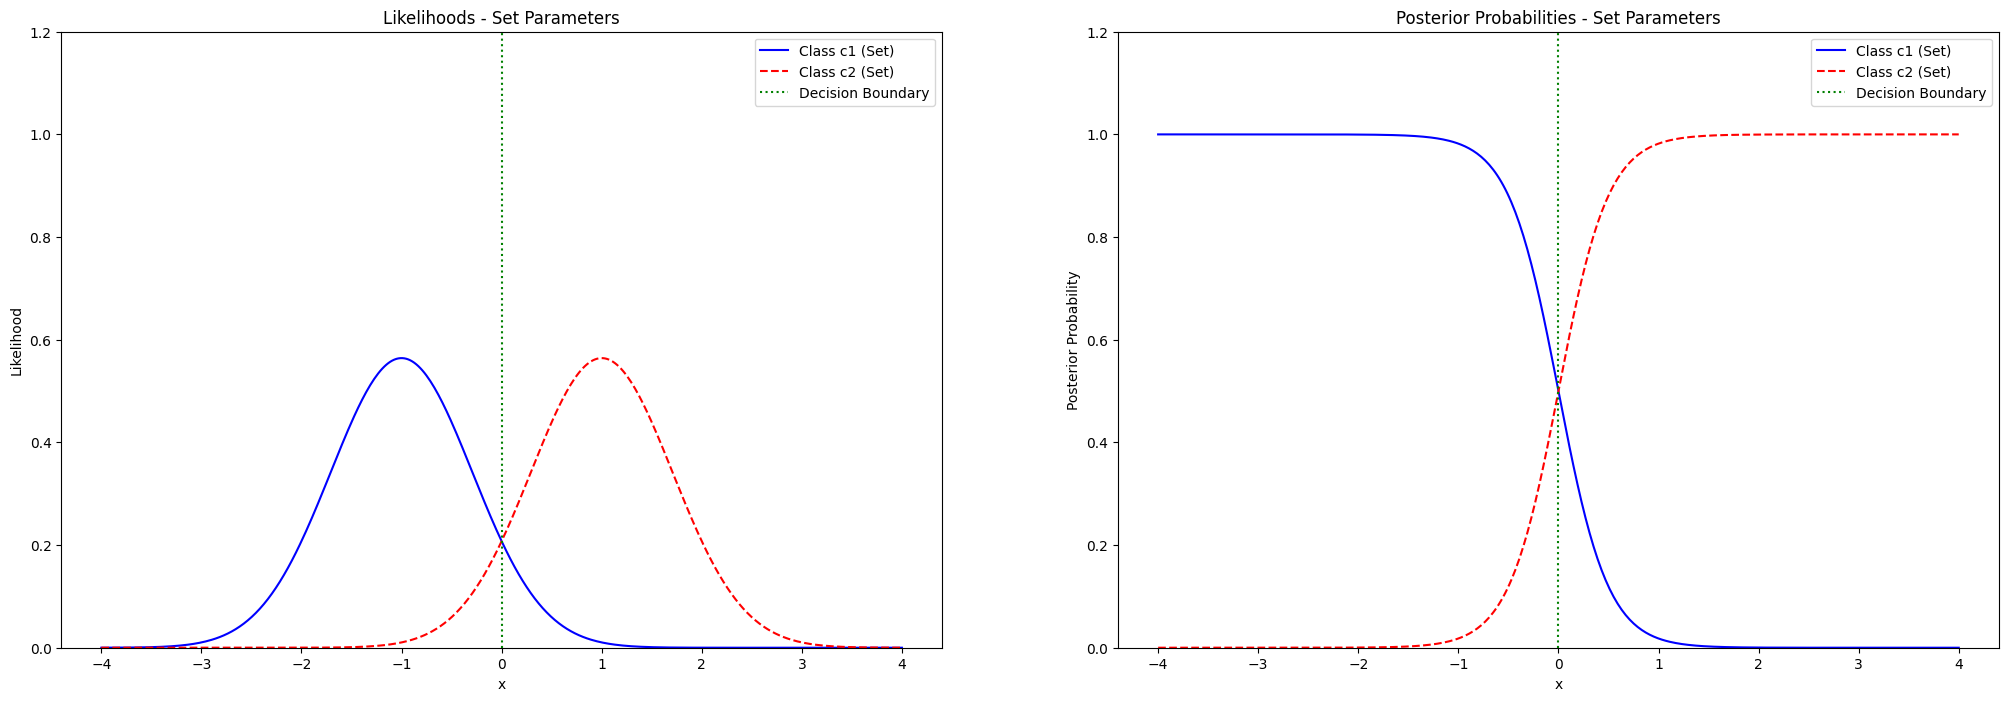

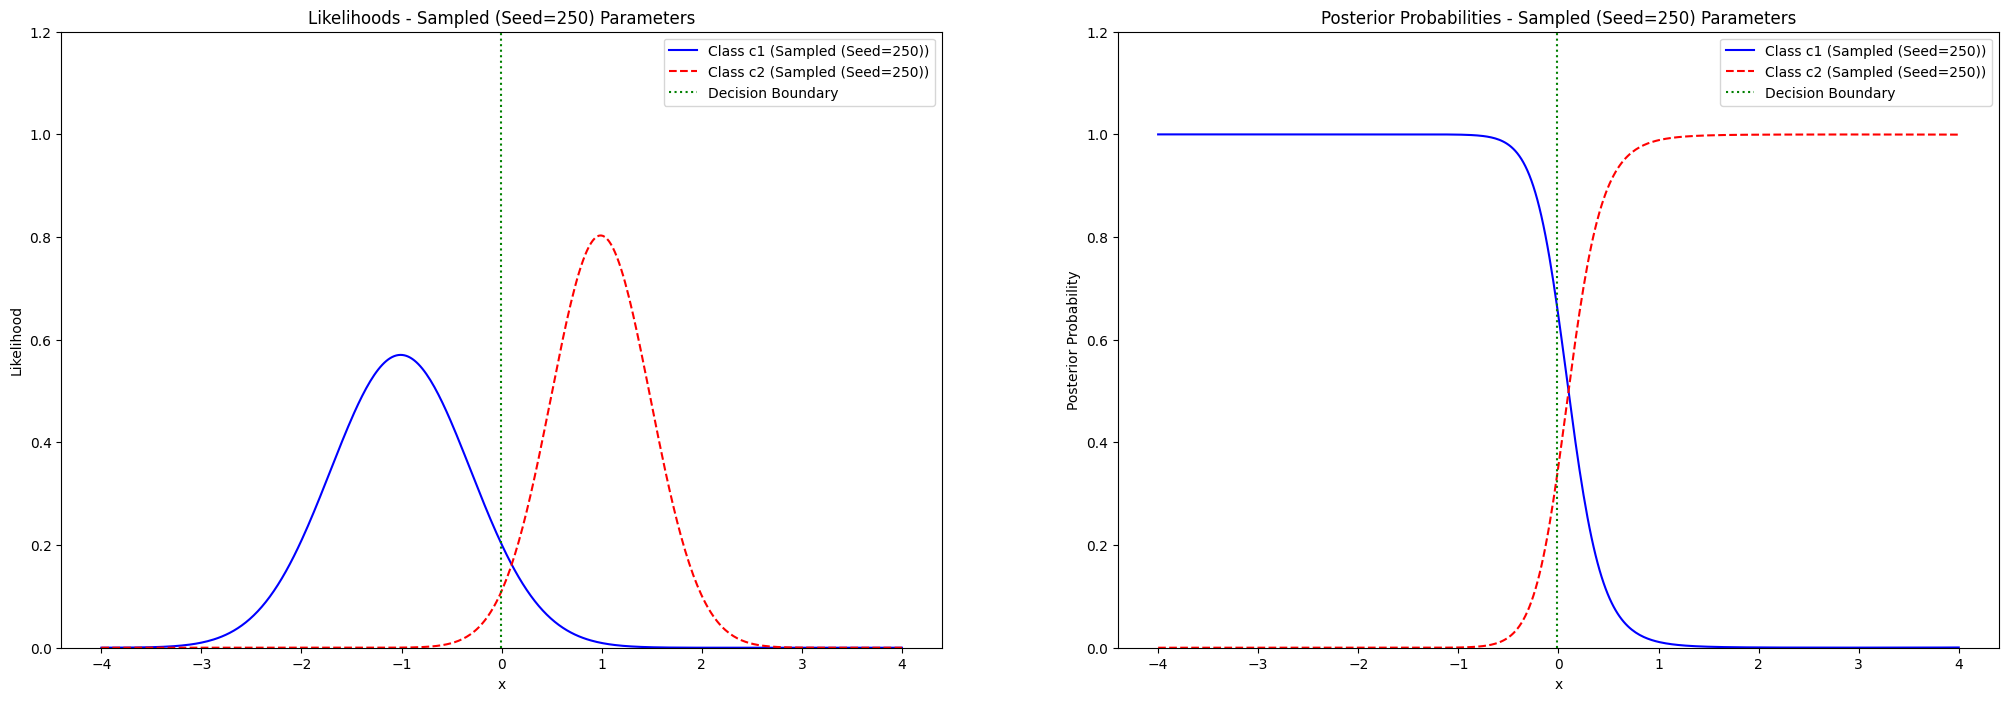

In [239]:

# Parameters
mean1, mean2 = -1, 1
variance = 0.50
prior1 = prior2 = 0.5

# Set the seed for randomness
random_seed = 250

# Plot Set and Sampled Distributions
plot_distribution(mean1, mean2, variance, prior1, prior2, seed=random_seed, sampled=False)
plot_distribution(mean1, mean2, variance, prior1, prior2, seed=random_seed, sampled=True)
